## README file for ``interp.py`` 


This code has functions for interpolation and extrapolation used in ``nu_e_collisions.py`` and ``basic_code.py`` (see https://github.com/hannahrasmussen. To make an ``Interpolate`` package, execute the following steps:

1. Navigate to the directory that your BasicCode folder is in. Make a folder there called ``Interpolate``, then make a folder within ``Interpolate`` that is also named ``Interpolate``.
2. Download ``interp.py`` from my GitHub page at https://github.com/hannahrasmussen/Interpolate (you've probably already done that if you're reading this) and put it in the folder within the folder.
3. In the folder (not the folder within the folder), put a ``setup.py`` folder with the following code:
        from setuptools import setup
        setup(name='interp',
          version='0.1',
          description='Interpolation and extrapolation code',
          url='https://github.com/hannahrasmussen/interp',
          author='Hannah Rasmussen',
          author_email='hannahrasmussen17@gmail.com',
          license='MIT',
          packages=['interp'],
          zip_safe=False)
          
4. Now, go to the terminal and checkout your new folder (not the folder within a folder) using the ‘cd’ command. 
5. Once you’re there, type and enter ‘pip install -e .’ (including the period). That ‘-e’ extension means that updates you make to the code are automatically also installed, which is obviously what we want.
6. Now, to see if it worked, open a separate jupyter notebook kernel and try and do ‘from nu_e_coll import nu_e_collisions’. If there are no errors, you can delete that line and should be good to run the code as is.

## Functions

### ``log_fix`` 
Since $\log(0)$ does not exist, but $f$ is very often equal to zero (especially at $\epsilon=0$), this function prevents problems arising from taking the log of 0 by just setting ``log_y[i]`` $= -200$ any time ``y[i]`` $ = 0$.
* **Imports**
    * ``y``: An array of $y$ values that we want to take the logarithm of for easier interpolation and extrapolation calculation purposes. 
* **Outputs**:
    * ``log_y``: Simply the log of ``y``, except in the case that ``y[i]`` $= 0$, then ``log_y[i]`` $= -200$.

### ``lin_int`` 
This function uses a fifth-order version of Newton's divided difference method, a method of interpolation, to calculate the y value that corresponds to an x value that is between x values with known corresponding y values. Since it's fifth order, this function requires six x values (and their corresponding six y values) to interpolate and calculate the approximation of $f(x)$.
* **Imports**
    * ``X``: The x value whose corresponding y value we wish to approximate with interpolation.
    * ``x``: An array of length 6 containing x values. Ideally, ``x[2]<X`` and ``X<x[3]``, but if ``X`` is near either end of ``x``, then the first or last 6 values of the x array are sent. In ``nu_e_collisions.py``, ``x`` always contains neutrino momenta values, but of course this function is versatile and can be applied to other scenarios.
    * ``y``: An array of length 6 contain the y values that correspond to ``x``. In ``nu_e_collisions.py``, ``y`` is always the logarithm of $f$, but of course this function is versatile and can be applied to other scenarios.
* **Outputs**:
    * ``Y``: An approximation of the y value that corresponds to ``X``.
   
### ``interp`` 
Serves the purpose of choosing which six values to send to ``lin_int`` (or simply return 0 if extrapolation is required). ``lin_int`` uses a fifth-order version of Newton's divided difference interpolation method that takes 6 x values and 6 corresponding y values where the x value of interest is ideally in the middle of the six values. If this is not possible, that is, if ``X`` is less than ``x[2]`` or greater than ``x[-3]``, then the first 6 or last 6 values of ``x_full`` are sent to ``lin_int``, respectively.
* **Imports**
    * ``X``: The x value whose corresponding y value we wish to calculate.
    * ``x_full``: The entire array of x values from which six will be chosen to use for interpolation.
    * ``y_full``: The entire array of y values (which are the logarithm of the "true" y values if this was called from ``interp_log``).
* **Calculations**
    * ``j``: The last index at which ``x_full`` $<$ ``X``. If ``j``<3, the first six values of ``x_full`` are sent to ``lin_int``, if ``j``>``len(x_full)-4``, the last six values of ``x_full`` are sent, and otherwise ``x_full[j-3:j+3]`` is sent.
* **Outputs**:
    * The y value that corresponds to ``X``.

### ``interp_log`` 
Returns an extrapolated $y$ value that corresponds to an $x$ value sent to this function. It calls ``interp`` and sends the logarithm of ``y`` to ensure a positive y value is returned. It simply takes the exponent of the output of ``interp`` to return the correct correponding value of ``Y`` to ``X``.
* **Imports**
    * ``X``: The x value whose corresponding y value we wish to calculate.
    * ``x_full``: The entire array of x values from which six will be chosen to use for interpolation.
    * ``y_full``: The entire array of y values.
* **Outputs**:
    * The exponent of the output of ``interp``, that is, the true y-value that corresponds to ``X``.

### ``linear_extrap`` 
This function uses linear extrapolation to calculate an extrapolated y value that corresponds to a given x value using the last two known y values. 
* **Imports**
    * ``X``: The x value whose corresponding y value we wish to calculate.
    * ``x``: An array of length two of the last two x values whose corresponding y values are known. ``X`` is greater than ``x[0]`` and ``x[1]``.
    * ``y``: An array of length two of the $\it{logarithm}$ of the last known y values ``y`` that was sent to ``log_linear_extrap``.
* **Outputs**:
    * ``Y``: The extrapolated value that corresponds to ``X``. Note that it is the logarithm of the value we "really" want, so ``log_lonear_extrap`` takes the exponent of it to return the correct value.

### ``log_linear_extrap`` 
Returns an extrapolated $y$ value that corresponds to an $x$ value sent to this function. It calls ``linear_extrap`` and sends the logarithm of ``y`` to ensure it does not return a negative value for ``Y``. It simply takes the exponent of the output of ``linear_extrap`` to return the correct correponding value of ``Y`` to ``X``.
* **Imports**
    * ``X``: The x value whose corresponding y value we wish to calculate.
    * ``x``: An array of length two of the last two x values whose corresponding y values are known. ``X`` is greater than ``x[0]`` and ``x[1]``.
    * ``y``: An array of length two of the last two known y values. 
* **Outputs**:
    * ``Y``: The y-value that corresponds to ``X``. Calls ``linear_extrap`` to calculate the logarithm of this value; I think to ensure the output is not negative (see example below).

### An example so the reader may better understand some of this code:

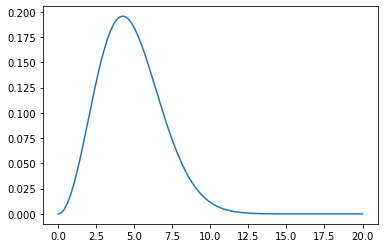

In [1]:
from Interpolate import interp
import matplotlib.pyplot as plt
import numpy as np

a = 3
x_arr = np.linspace(0,20,201)
y_arr = np.sqrt(2/np.pi)*x_arr**2*(np.e**((-x_arr**2)/(2*a**2))/a**3) #thermal distribution

plt.figure()
plt.plot(x_arr,y_arr)
plt.show()

In [2]:
print("Using just linear_extrap to get y(21) gives us a negative value, which is not physical!: " +str(interp.linear_extrap(21,x_arr[-2:],y_arr[-2:])))
print("Using log_linear_extrap to get y(21) not only gives us a value closer to the true value, but it also ensures the output won't be negative: " +str(interp.log_linear_extrap(21,x_arr[-2:],y_arr[-2:])))
print("True value: "+str(np.sqrt(2/np.pi)*21**2*(np.e**((-21**2)/(2*a**2))/a**3)))

Using just linear_extrap to get y(21) gives us a negative value, which is not physical!: -3.5829715282976305e-09
Using log_linear_extrap to get y(21) not only gives us a value closer to the true value, but it also ensures the output won't be negative: 3.1805343141056404e-10
True value: 2.984008666732438e-10
